In [1]:
import os
import json
import cv2
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.image as mpimg

In [2]:
def _coco_box_to_bbox(box):
    bbox = np.array([box[0], box[1], box[0] + box[2], box[1] + box[3]],
                    dtype=np.float32)
    return bbox

In [3]:
root_path = '../VOC2012_coco/annotations'
annot_path = os.path.join(root_path, 'annotations.json')


for path in [annot_path]:
    with open(path, 'r') as file:
        json_dict = json.load(open(path, 'r'))
    images = json_dict['images']
    annots = json_dict['annotations']
    print('images', len(images))
    print('annotations', len(annots))

images 5717
annotations 15774


In [4]:
import pycocotools.coco as coco

annot_path = os.path.join(root_path, 'annotations.json')
coco = coco.COCO(annot_path)
images = sorted(coco.getImgIds())

loading annotations into memory...
Done (t=0.14s)
creating index...
index created!


In [5]:
index = 2
image_folder = os.path.join(root_path, '../image')
img_id = images[index]
file_name = coco.loadImgs(ids=[img_id])[0]['file_name']
img_path = os.path.join(image_folder, file_name)
img_path

'../VOC2012_coco/annotations/../image/2008_000019.jpg'

In [6]:
ann_ids = coco.getAnnIds(imgIds=[img_id])
anns = coco.loadAnns(ids=ann_ids)

In [7]:
# max number of object in image
max_objs = 50
num_objs = min(len(anns), max_objs)

In [8]:
img = cv2.imread(img_path)

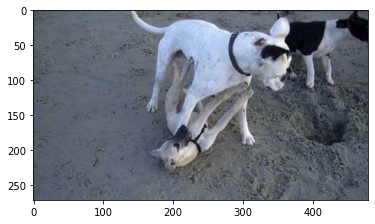

In [9]:
img = mpimg.imread(img_path)
plt.imshow(img)

(272, 480, 3)
[139, 2, 233, 195]
[165, 66, 153, 170]
[361, 1, 119, 111]


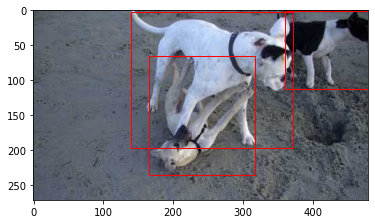

In [10]:
img = mpimg.imread(img_path)

plt.imshow(img)
print(img.shape)

for k in range(num_objs):
    ann = anns[k]
    bbox = ann['bbox']
    
    [x, y, w, h] = bbox
    print(bbox)
    plt.gca().add_patch(Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none'))